In [10]:
import processor
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
from scipy import fftpack

In [25]:
reload(processor)

<module 'processor' from 'processor.py'>

In [11]:
import scikits.audiolab
from scikits.audiolab import Sndfile

files = processor.parse_source(processor.sources[0])
filename = files[0][0]

f = Sndfile(filename, 'r')

fs = f.samplerate
nc = f.channels
enc = f.encoding
n = f.nframes
data = f.read_frames(n)

In [67]:
timestep = 1/float(fs)
spectrum = fftpack.fft(data)
freq = fftfreq(data.size, d=timestep)

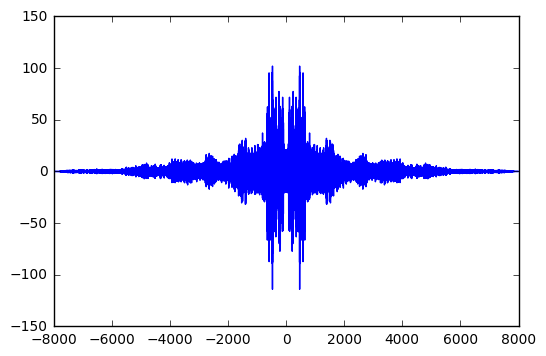

In [68]:
plt.figure()
plt.plot(freq, spectrum)
plt.show()

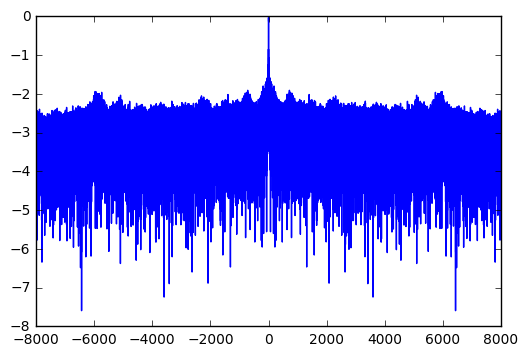

82000

In [69]:
cepstrum = processor.cepstrum(data)
plt.figure()
plt.plot(freq, np.log10(np.abs(cepstrum)))
plt.show()
cepstrum.size

In [69]:
scikits.audiolab.play(data, fs=fs)


Period size is 64 , Buffer size is 8000


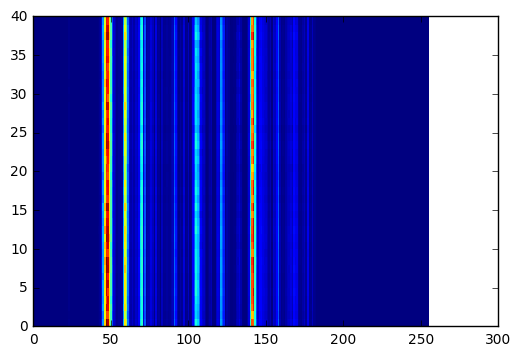

(40, 255)
(121, 255)


In [72]:
reload(processor)
coeffs, spectragram = processor.process_recording(filename)
plt.figure()
heatmap = plt.pcolor(np.abs(coeffs))
plt.show()
print(coeffs.shape)
print(spectragram.shape)

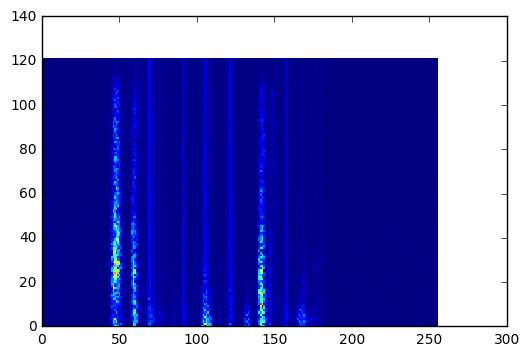

In [73]:
plt.figure()
heatmap = plt.pcolor(np.log10(1+np.abs(spectragram)))
plt.show()